In [1]:
cd demo

/Users/annabell/UofU/Sigman/python-modeling/demo


In [2]:
from visualize import visualize
from reading_data import read_excel_file

# get data

In [3]:
read_methods = read_excel_file()

In [4]:
header_col = 5
rows_start = 0
rows_stop = 24
cols_start = 2
cols_stop = 24

In [5]:
read_methods.read_excel_file("../model_oct_bothsubs"+".xlsx", "bubbleplot", header_col, rows_start, rows_stop, cols_start, cols_stop)

In [6]:
my_dataframe = read_methods.df.copy()
my_dataframe.head()

,s2_1h_%yield,s2_3.5h_%yield(avg),s2_21h_%yield,s4_1h_%yield,s4_3.5h_%yield(avg),s4_21h_%yield,virtual,nbo_N_oxamide_max,nbo_aryl_sub_=O_max_max
0,18,55.500000,92,6,27.666667,69,0,-0.59232,-0.89851
1,9,36.333333,92,6,27.000000,65,0,-0.58780,-0.90730
2,6,19.666667,73,2,11.333333,57,0,-0.57818,-0.90199
3,17,57.666667,89,7,35.500000,61,0,-0.59187,-0.89612
4,8,48.333333,83,3,21.333333,55,0,-0.59182,-0.90570


# Visualize

In [7]:
visualize_methods = visualize(my_dataframe)

## exclude a feature

In [8]:
visualize_methods.exclude_features(["virtual"])

## Histogram

You can plot for one specific column

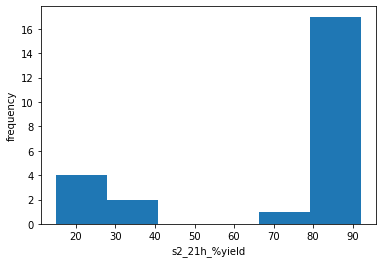

In [9]:
visualize_methods.build_hist(["s2_21h_%yield"])

A list of columns produces multiple plots

In [10]:
# visualize_methods.build_hist(["s2_1h_%yield", "s2_3.5h_%yield(avg)", "s2_21h_%yield"])

Or all of them: no parameters provides a plot for each column

In [11]:
# visualize_methods.build_hist()

## Univariate Regression Visualization

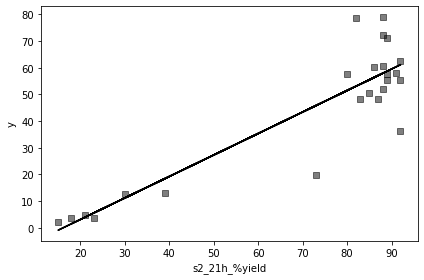

In [12]:
#if you don't add a list of columns, it will produce a plot for all columns
#if you don't provide a y column, it will use a zero vector
visualize_methods.build_univar(cols=["s2_21h_%yield"], y=my_dataframe["s2_3.5h_%yield(avg)"])

A list of columns produces multiple plots

In [ ]:
# visualize_methods.build_univar(cols=["s2_1h_%yield", "s2_21h_%yield"], y=my_dataframe["s2_3.5h_%yield(avg)"])

If you want all of them, don't specify cols, but explicitly specify y. 

In [14]:
# visualize_methods.build_univar(y=my_dataframe["s2_3.5h_%yield(avg)"])

If you don't specify y, it will be an n-dimensional zero vector.

In [17]:
# visualize_methods.build_univar(cols=["s2_1h_%yield"])